# CodersCave_CVIP
## Phase-1: Normal Task

### Problem Statement: *Analyze Customer Behavior Based on Transaction Data*
Develop a data analysis project that focuses on understanding and analyzing
customer behavior based on transactional data. The goal is to perform Exploratory
Data Analysis (EDA) to derive valuable insights into customer preferences,
purchasing patterns, and overall behavior.

**Dataset: https://www.kaggle.com/datasets/iamprateek/store-transaction-data**

In [4]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import the Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
sns.set()

### Importing the Dataset

In [6]:
df = pd.read_csv('/content/drive/MyDrive/STUDY/DS/Internships/CodersCave/Phase-1: Normal Task (EDA)/Hackathon_Working_Data.csv')

### Analyzing the Data

In [7]:
df.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [8]:
df.tail()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN
26984,M3,N10,31,T6013,15.0,1.0,15.0,15.0,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,SAJ INDS,BISK FARM,BISK FARM JUST GINGER


In [9]:
df.shape

(26985, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [11]:
# Check for Duplication
df.nunique()

MONTH           3
STORECODE      10
DAY            31
BILL_ID      6424
BILL_AMT     1453
QTY            45
VALUE         640
PRICE         492
GRP            80
SGRP          174
SSGRP         232
CMP           354
MBRD          643
BRD          1315
dtype: int64

In [12]:
# Check for Missing Values
df.isnull().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [13]:
# Check for Duplicate Values
df = df.drop_duplicates()
df

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN


**There's no missing value or duplicate row**

In [14]:
# Statistical Insight
df.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26895.000000,26895.000000,26895.000000,26895.000000,26895.000000
mean,15.163971,278.847163,4.114854,67.887907,52.862412
std,8.960140,542.012679,95.826730,118.127648,85.061997
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,65.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


#### Feature Engineering (Merging/Dropping)

In [15]:
# Merging the 'STORECODE' & 'BILL_ID'

df['UNIQUE_ID'] = df['STORECODE'].str.cat(df['BILL_ID'], sep='_')
df

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007


In [17]:
by_store = df.groupby('UNIQUE_ID').mean()[['DAY', 'BILL_AMT', 'QTY']]
by_store

,DAY,BILL_AMT,QTY
UNIQUE_ID,,,
N10_T1038,5.0,34.0,1.000000
N10_T1039,5.0,46.0,1.000000
N10_T1040,5.0,86.0,1.000000
N10_T1043,5.0,20.0,1.000000
N10_T1048,5.0,180.0,1.000000
...,...,...,...
N9_T940,2.0,200.0,1.000000
N9_T95,7.0,56.0,1.000000
N9_T953,3.0,1656.0,2.545455


In [18]:
merged_df = pd.merge(df, by_store, on = 'UNIQUE_ID')
merged_df

,MONTH,STORECODE,DAY_x,BILL_ID,BILL_AMT_x,QTY_x,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID,DAY_y,BILL_AMT_y,QTY_y
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375,4.0,225.0,1.000000
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379,4.0,95.0,1.000000
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381,4.0,10.0,1.000000
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382,4.0,108.0,1.000000
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384,4.0,19.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26890,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999,31.0,10.0,1.000000
26891,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007,31.0,88.0,1.333333
26892,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007,31.0,88.0,1.333333
26893,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007,31.0,88.0,1.333333


In [19]:
merged_df = merged_df.drop(["DAY_x","BILL_AMT_x"], axis=1)
merged_df

,MONTH,STORECODE,BILL_ID,QTY_x,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID,DAY_y,BILL_AMT_y,QTY_y
0,M1,N1,T375,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375,4.0,225.0,1.000000
1,M1,N1,T379,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379,4.0,95.0,1.000000
2,M1,N1,T381,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381,4.0,10.0,1.000000
3,M1,N1,T382,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382,4.0,108.0,1.000000
4,M1,N1,T384,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384,4.0,19.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26890,M3,N10,T5999,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999,31.0,10.0,1.000000
26891,M3,N10,T6007,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007,31.0,88.0,1.333333
26892,M3,N10,T6007,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007,31.0,88.0,1.333333
26893,M3,N10,T6007,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007,31.0,88.0,1.333333


In [20]:
unique_sales = merged_df.groupby("UNIQUE_ID",as_index=True).mean()[["DAY_y","BILL_AMT_y"]]
unique_sales

,DAY_y,BILL_AMT_y
UNIQUE_ID,,
N10_T1038,5.0,34.0
N10_T1039,5.0,46.0
N10_T1040,5.0,86.0
N10_T1043,5.0,20.0
N10_T1048,5.0,180.0
...,...,...
N9_T940,2.0,200.0
N9_T95,7.0,56.0
N9_T953,3.0,1656.0


In [21]:
unique_sales['STORE'] = unique_sales.index.str.split('_').str[0]
unique_sales

,DAY_y,BILL_AMT_y,STORE
UNIQUE_ID,,,
N10_T1038,5.0,34.0,N10
N10_T1039,5.0,46.0,N10
N10_T1040,5.0,86.0,N10
N10_T1043,5.0,20.0,N10
N10_T1048,5.0,180.0,N10
...,...,...,...
N9_T940,2.0,200.0,N9
N9_T95,7.0,56.0,N9
N9_T953,3.0,1656.0,N9


### EDA (Exploratory Data Analysis) for the Sales

#### Total Sales by Store

In [22]:
sales_by_store = unique_sales.groupby("STORE")["BILL_AMT_y"].sum().sort_values(ascending=False)
sales_by_store

STORE
N7     273787.15
N9     250917.03
N5     238057.00
N2     221355.00
N4     206874.99
N1     144206.93
N10    142433.00
N3     125528.79
N8     116466.86
N6     110187.00
Name: BILL_AMT_y, dtype: float64

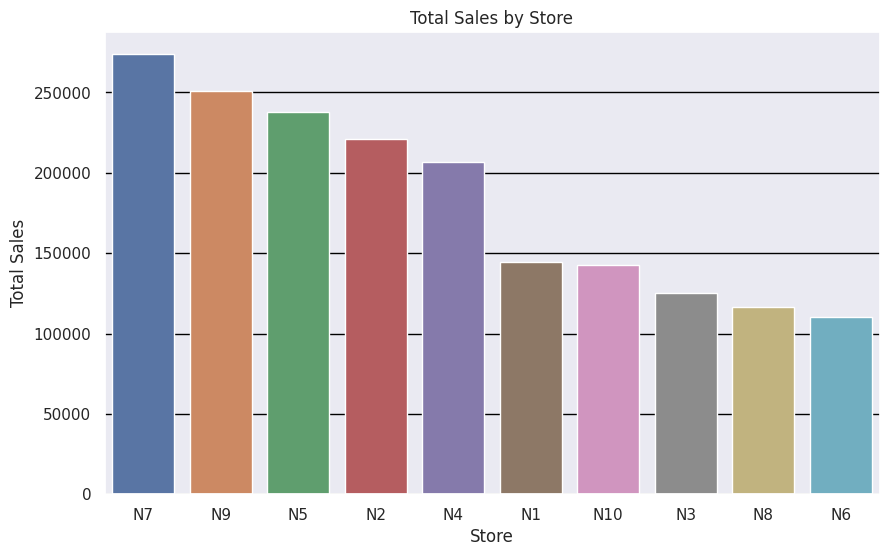

In [23]:
# Plotting Bar Chart
sales_by_store = unique_sales.groupby("STORE").sum().sort_values('BILL_AMT_y', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_store.index, y='BILL_AMT_y', data=sales_by_store)
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.grid(axis='y', color='black')
plt.show()

#### Daily Average Sales by Store

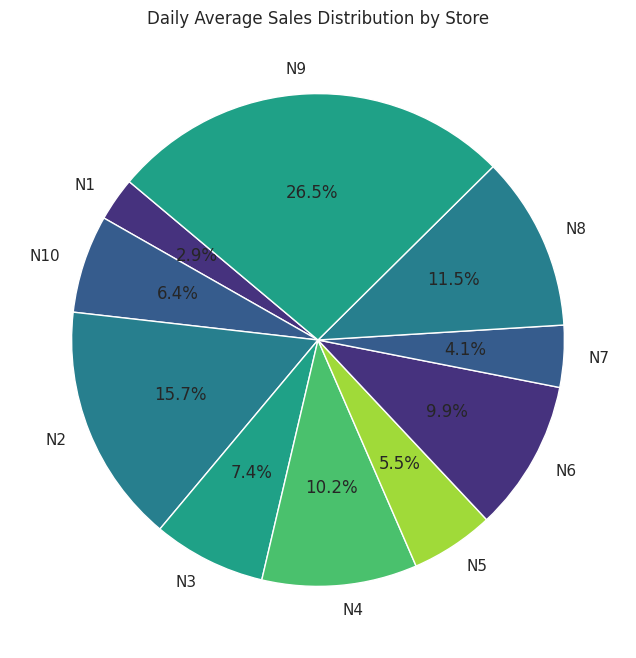

In [24]:
# Calculation of daily average sales
daily_average_sales = unique_sales.groupby("STORE")["BILL_AMT_y"].mean()

# Plotting pie chart for daily average sales
plt.figure(figsize=(8, 8))
plt.pie(daily_average_sales, labels=daily_average_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Daily Average Sales Distribution by Store')
plt.show()

#### Most Sold Out Categories of Each Store

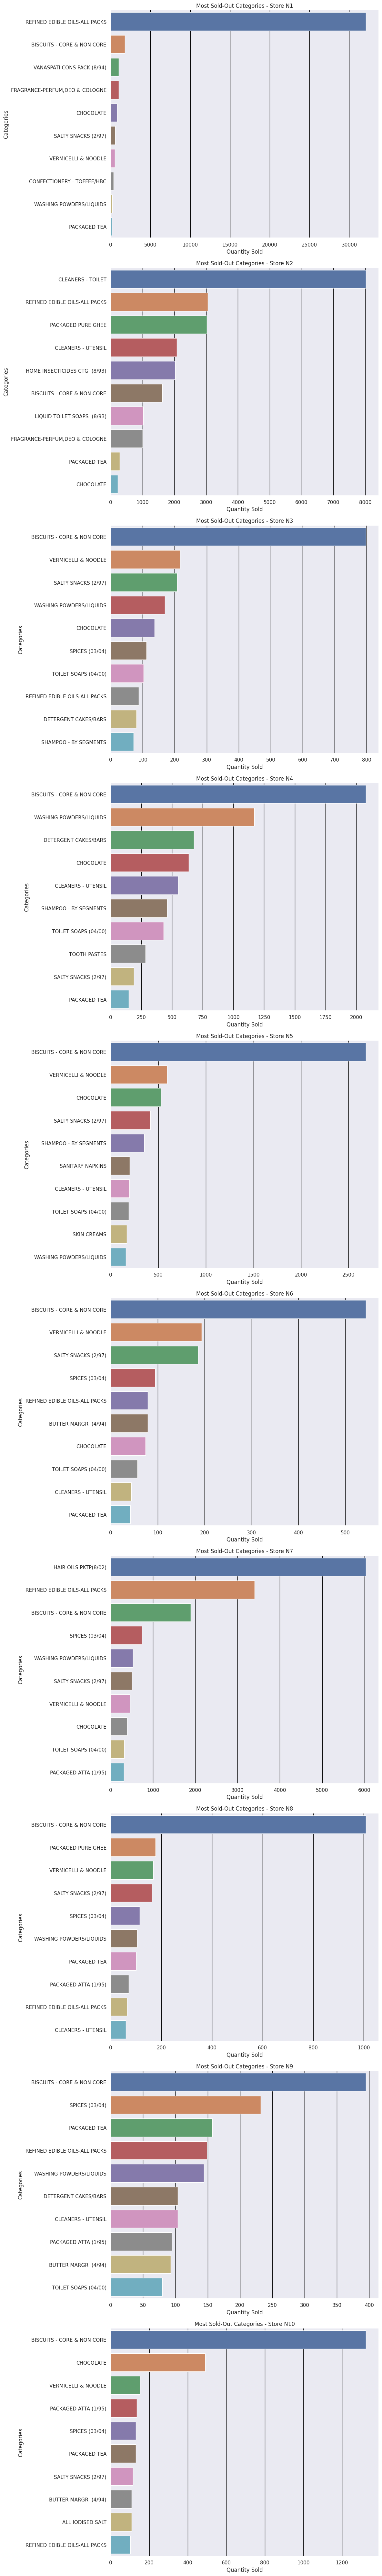

In [25]:
stores = merged_df['STORECODE'].unique()
fig, axes = plt.subplots(nrows=len(stores), ncols=1, figsize=(12, 8 * len(stores)))

for i, store in enumerate(stores):
    store_data = merged_df[merged_df['STORECODE'] == store]
    most_sold_categories = store_data.groupby('GRP').sum().sort_values("QTY_x", ascending=False)[['QTY_x']][0:10]

    sns.barplot(x='QTY_x', y=most_sold_categories.index, data=most_sold_categories, ax=axes[i])
    axes[i].set_title(f'Most Sold-Out Categories - Store {store}')
    axes[i].set_xlabel('Quantity Sold')
    axes[i].set_ylabel('Categories')
    axes[i].grid(axis='x', color='black')

plt.tight_layout()
plt.show()

#### Most Sold Out Brands

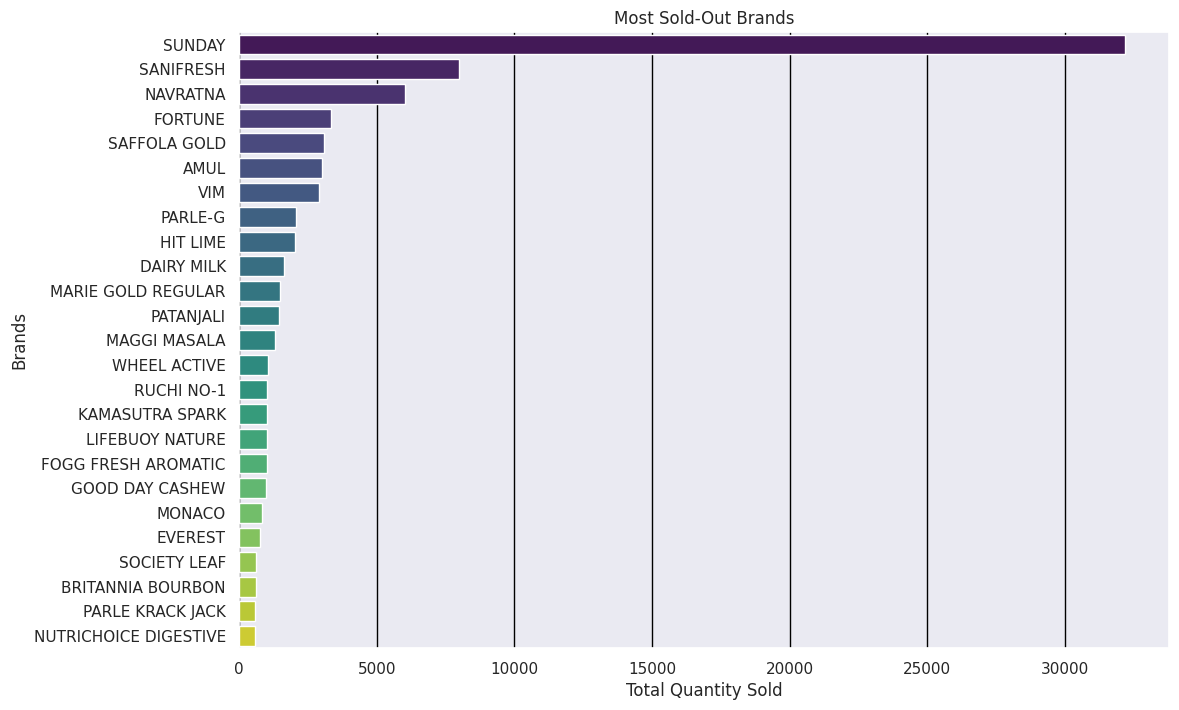

In [26]:
# Calculation
most_sold_brands = merged_df.groupby('BRD')['QTY_x'].sum().sort_values(ascending=False)[:25]

# Plotting a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=most_sold_brands.values, y=most_sold_brands.index, palette='viridis')
plt.title('Most Sold-Out Brands')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Brands')
plt.grid(axis='x', color='black')
plt.show()

### Items in Each Category

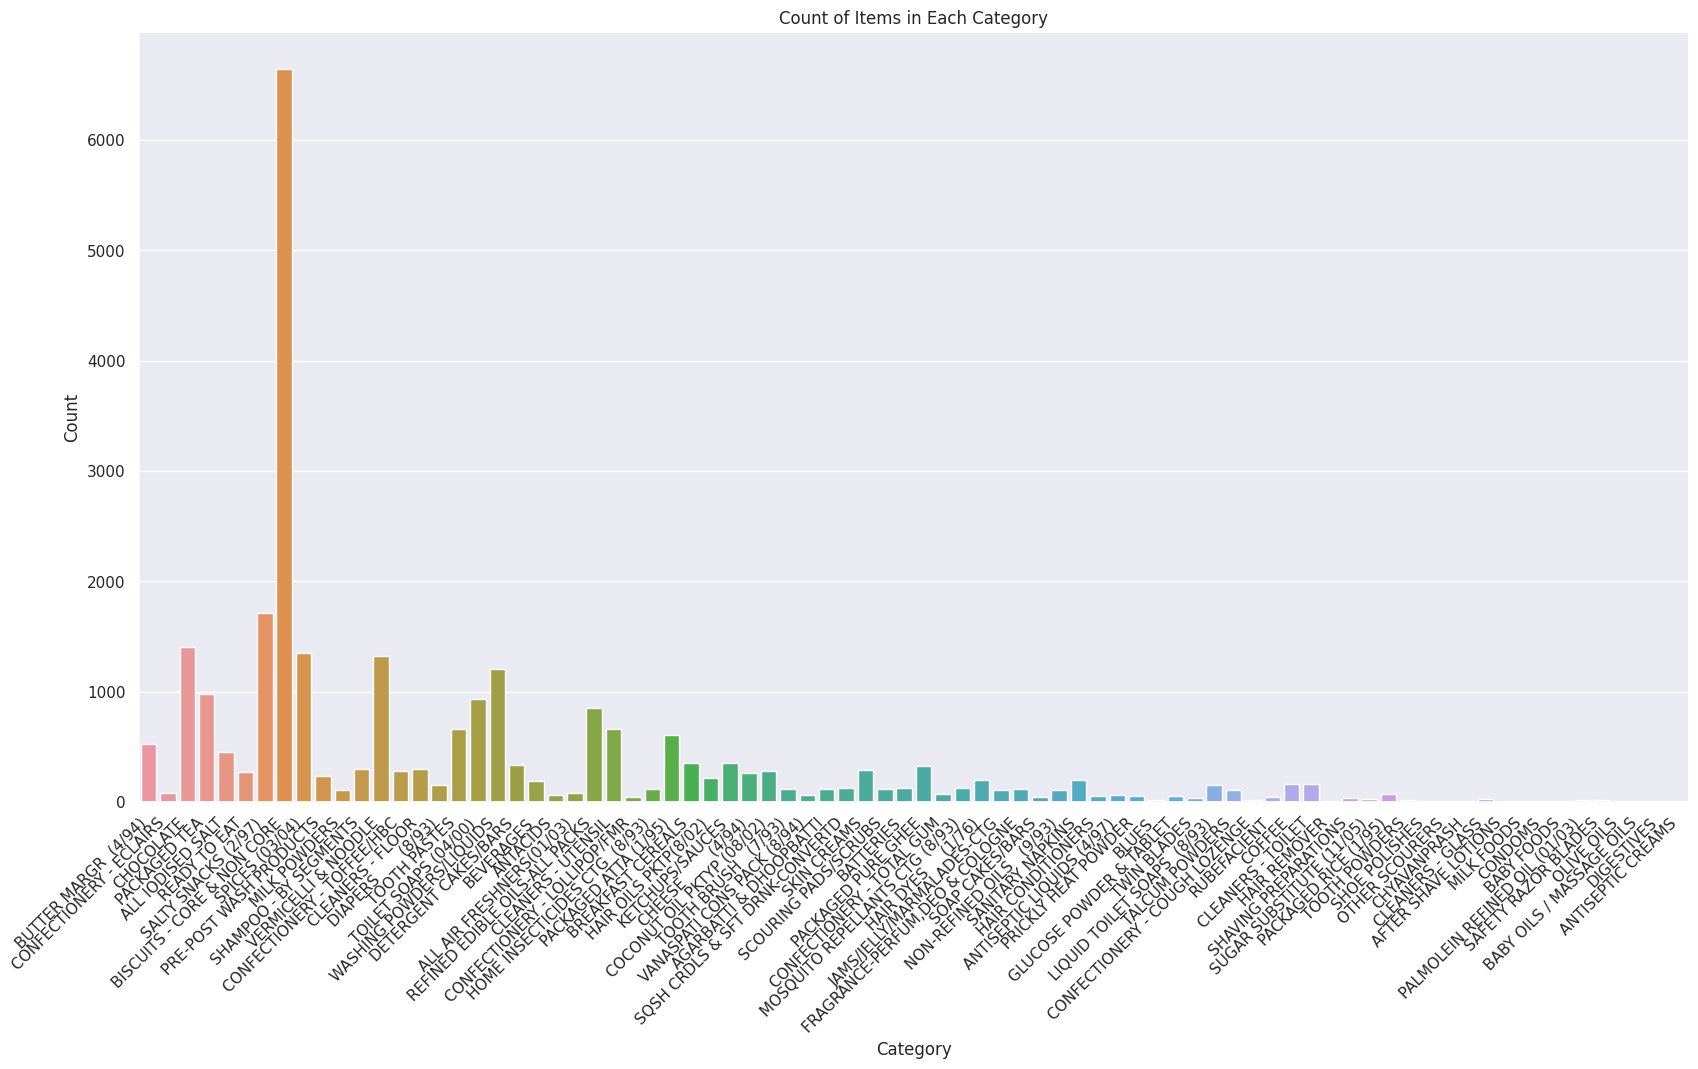

In [30]:
# Count plot
plt.figure(figsize=(20, 10))
sns.countplot(x='GRP', data=df)
plt.title('Count of Items in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### Conclusion: Exploratory Data Analysis (EDA) for Customers' Behaviour & Sales Analysis

Through our EDA, we've gained valuable insights into sales patterns. Variations in store performance highlight opportunities for targeted strategies. Top-selling categories and influential brands are identified, guiding marketing efforts. Seasonal trends and the quantity-value relationship offer actionable intelligence for adapting sales approaches. Outlier detection enhances the accuracy of forecasts and inventory management. Overall, this analysis provides a foundation for informed decision-making, enabling businesses to optimize sales, inventory, and marketing efforts.